In [18]:

import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [12]:
df=sns.load_dataset("titanic")

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df2=df[['survived','pclass','age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [15]:
df3=df2.fillna(df2.mean())

In [16]:
x=df3.drop(columns='survived',axis=1)
y=df3['survived']

In [17]:
print(x.shape)
print(y.shape)

(891, 3)
(891,)


In [47]:
x_train,x_test ,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 3)
(712,)
(179, 3)
(179,)


In [49]:
sc=StandardScaler()
sc.fit(x_train)

StandardScaler()

In [50]:
x_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [51]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [52]:
x_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [53]:
x_train_sc=pd.DataFrame(x_train_sc,columns=['pclass','age','parch'])
x_test_sc=pd.DataFrame(x_test_sc,columns=['pclass','age','parch'])

In [54]:
x_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


In [55]:
mmc=MinMaxScaler()
mmc.fit(x_train)

MinMaxScaler()

In [58]:
x_train_mms=mmc.transform(x_train)
x_test_mms=mmc.transform(x_test)

In [60]:
x_test_mms

array([[0.        , 0.56078209, 0.        ],
       [1.        , 0.44743553, 0.        ],
       [1.        , 0.41909889, 0.        ],
       [0.        , 0.4148359 , 0.        ],
       [0.5       , 0.47577217, 0.2       ],
       [1.        , 0.44743553, 0.        ],
       [0.        , 0.65996033, 0.        ],
       [1.        , 0.22074242, 0.        ],
       [0.5       , 0.9291584 , 0.        ],
       [0.        , 0.2065741 , 0.2       ],
       [0.5       , 0.43326721, 0.        ],
       [0.5       , 0.39076226, 0.        ],
       [0.        , 0.63162369, 0.        ],
       [1.        , 0.31992066, 0.        ],
       [1.        , 0.57495041, 1.        ],
       [0.5       , 0.3482573 , 0.        ],
       [0.5       , 0.50410881, 0.4       ],
       [1.        , 0.4148359 , 0.        ],
       [1.        , 0.4148359 , 0.        ],
       [0.5       , 0.26324738, 0.        ],
       [1.        , 0.4148359 , 0.        ],
       [0.5       , 0.24907906, 0.        ],
       [1.

In [61]:
x_train_mms=pd.DataFrame(x_train_mms,columns=['pclass','age','parch'])
x_test_mms=pd.DataFrame(x_test_mms,columns=['pclass','age','parch'])

In [63]:
x_test_mms.describe().round(2)

,pclass,age,parch
count,179.00,179.00,179.00
mean,0.66,0.42,0.07
std,0.40,0.18,0.17
min,0.00,0.01,0.00
25%,0.50,0.33,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.13,1.20


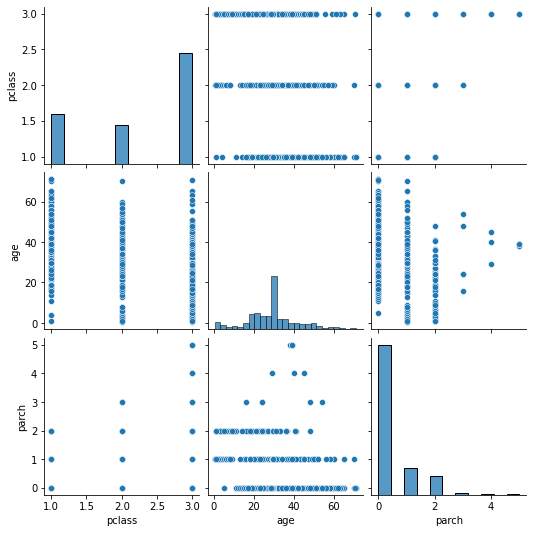

In [64]:
sns.pairplot(x_train)

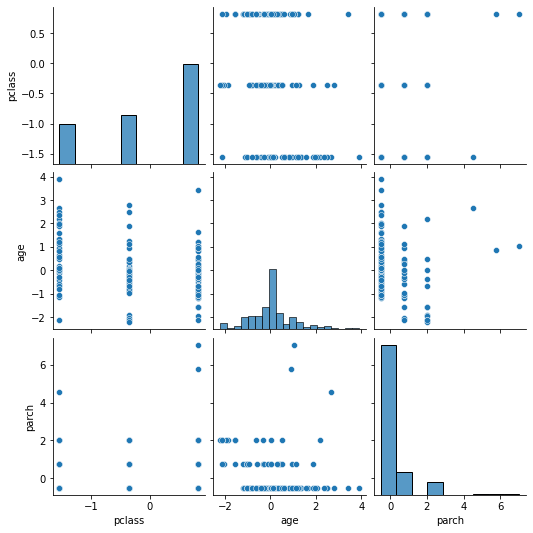

In [65]:
sns.pairplot(x_test_sc)

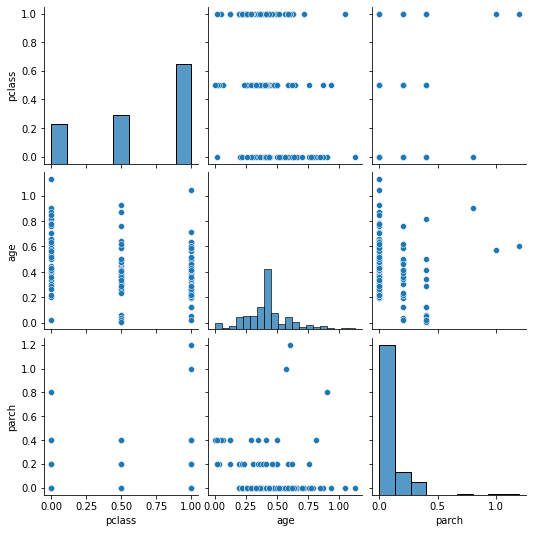

In [66]:
sns.pairplot(x_test_mms)